## CNN
Referencing https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

### Import relevant modules

In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape, concatenate,  Reshape, Flatten
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, RepeatVector, Permute, Activation,Lambda
from keras.layers import Conv2D, MaxPool2D, Flatten,multiply,SpatialDropout2D
from keras.regularizers import l2
import tensorflow as tf
import keras
import keras.backend as K
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers import MaxPooling2D, Input, Dense, Flatten ,AveragePooling2D

from keras.optimizers import Adam,rmsprop,SGD

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.initializers import glorot_normal
from keras import regularizers

from keras.layers import Dense
from keras.models import Model
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.


In [2]:
import zipfile
from urllib import request
import imutils
import matplotlib.image as mpimg
import random
%matplotlib inline
import cv2
from glob import glob
import keras,math
import cv2 as cv 
import pandas as pd
from keras.models import load_model
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose, Reshape ,MaxPooling2D, advanced_activations
from keras.layers import concatenate, Concatenate,Dense, Flatten,SeparableConv2D,LeakyReLU,GlobalAveragePooling2D
from keras.layers import BatchNormalization, RepeatVector, Permute, Activation, Reshape, Flatten,Multiply
from keras.layers.advanced_activations import PReLU

from keras.layers import Lambda,Add,Dropout,SpatialDropout2D,DepthwiseConv2D,normalization
from keras.models import Sequential, Model 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.backend import clear_session
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from keras.layers import MaxPooling2D, Input, Dense, Flatten,ThresholdedReLU
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.gridspec as gridspec
 
import tensorflow as tf 
import keras
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
 
# aita die akta tensor e sob image k nie astasi
 
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add
#from SpectralNormalizationKeras import DenseSN, ConvSN2D

from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add
#from SpectralNormalizationKeras import DenseSN, ConvSN2D
 
from keras.optimizers import Adam 

In [26]:
from numpy import random
import matplotlib.pyplot as plt

z=random.randn(200)
x=list()
for i in range(len(z)):
    d=z[i]
    x.append(d)
    
y=np.asarray(x)
 

0.4198064761326699

### Config

In [4]:
di= 256
batch_size = 16


In [5]:
from func.arcl import unt2,unt3,w3

In [6]:
def mish(x):
    x=BatchNormalization()(x)
    x4 = Activation('softplus')(x)
    x4=Activation('tanh')(x4)
    y = Lambda(lambda x: x[0]*x[1])([x4,x])
    return y

def swish(x):
    #x=BatchNormalization()(x)
    x1 = Activation('relu')(x)
    x2 = Activation('sigmoid')(x)
    y = Lambda(lambda x: x[0]*x[1])([x2,x])
    return y

def poold(x):
    m=MaxPool2D(pool_size=5, strides=1,padding='same')(x)
    a=AveragePooling2D(pool_size=5, strides=1,padding='same')(x)
    ad=Lambda(lambda x: x[0]+x[1])([m,a])
    av=Lambda(lambda x: x*0.5)(ad)
    y=Lambda(lambda x: x[0]+x[1])([x,av])
 
 
def cnf(z,f):
    return Conv2D(f, kernel_size=5, strides=1,padding='same',activation="relu",kernel_initializer='he_normal',
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(z)

def cnh(z,f,k,s):
    return Conv2D(f, kernel_size=k, strides=s,padding='same',activation="relu",kernel_initializer='he_normal',
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(z)
 

In [7]:
 
def actc(x):      
    x1 = Activation('relu')(x)
    x2 = Activation('sigmoid')(x)
    x3 = Lambda(lambda x: x[0]*x[1])([x2,x])
    x4 = Activation('softplus')(x)
    x4=Activation('tanh')(x4)
    x5 = Lambda(lambda x: x[0]*x[1])([x4,x])
    c1= Conv2D(5, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(x1)  
    c2= Conv2D(5, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(x3)  
    c3= Conv2D(5, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(x5)  
    cx=concatenate([c1,c2,c3], axis = 3)
    #cx= BatchNormalization()(cx) x2=add([x2,cnh(x2,64,1,1)])
    y= Conv2D(3, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(cx)
    return y
 
 
from classifiers.ResNet import ResNet18   
 
def rw(input_tensor, features ):
    x = Conv2D(features, 3, activation='relu', padding='same', kernel_initializer='he_normal')(input_tensor)
    x = Conv2D(features, 3, padding='same')(x)
    return add([input_tensor, x])    


def mdsr2(ix,f):
    x=Conv2D(f, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(ix)
    y=actc(ix)
    x1=rw(x,f)
    x1=rw(x1,f)
    x2=rw(x,f)
    x2=rw(x2,f)
    x3=rw(x,f)
    x3=rw(x3,f)
    x=add([x1,x2,x3])
    x=Conv2D(3, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(x)
    x=add([x,y ])
    return x  

### Setup

### Fitting the model using train images

In [8]:
weight_decay = 1e-4
# num_classes = 1
# resnet18 = ResNet18(input_shape=(di, di, 1), classes=num_classes, weight_decay=weight_decay)    

input_im = Input(shape=(di, di, 1))
#input_img=Lambda(lambda x:3*x**2-2*x**3)(input_im) 

x1=cnh(input_im,64,9,4) 
x1=actc(x1) 
y1=unt2(x1,3)
x2=cnh(x1,64,9,1) 
x2=mdsr2(x2,10)
x2=concatenate([y1,x2], axis = 3)
p2 = MaxPooling2D(pool_size=(1, 1))(x2)
p2 = Activation('relu')(p2)
y= Conv2D(1, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(p2) 
 
  
# model = Model(input_im, y)


 

 
 
 
  
model = Model(input_im, y)


In [8]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   5248        input_1[0][0]                    
__________________________________________________________________________________________________
activation_3 (Activation)       (None, 64, 64, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_2 (Activation)       (None, 64, 64, 64)   0           conv2d_1[0][0]                   
____________________________________________________________________________________________

In [9]:
# Compiling the CNN
 

 
 


In [10]:
from sklearn.preprocessing import normalize
from skimage.transform import rotate 
def augment_data(list_data, label, n): 
    augmented_data = list() 
    data_label = list()
    for i in range(0, len(list_data)):
        for j in range(0, n):
            angle = np.random.randint(0, 90)
            e_img = list_data[i]
            e_img = normalize(e_img)
            d_label = label[i]
            if np.random.uniform()<0.5:
                a_img = rotate(e_img, angle)
            else:
                a_img = rotate(e_img, -angle)
            a_img = np.reshape(a_img, (a_img.shape[0], a_img.shape[1], 1))
            augmented_data.append(a_img)
            data_label.append(d_label)
        
    return augmented_data, data_label

In [11]:
 
(img_width, img_height) = (di, di)


def load_imgages_from_folder(folder):
    (images, labels, names, id) = ([], [], {}, 0)
    for (subdirs, dirs, files) in os.walk(folder):
        print(subdirs, dirs)
        for subdir in dirs:
            names[id] = subdir
            subjectpath = os.path.join(folder, subdir)
            for filename in os.listdir(subjectpath):
                path = subjectpath + '/' + filename
                label = id
                img = cv2.imread(path, 0)
                img = cv2.resize(img, (img_width, img_height))
#                 img = img /255
#                 img= np.reshape(img, (img.shape[0], img.shape[1], 1))
                images.append(img)
                labels.append(int(label))

            id += 1
#         print(names)
#         print(labels)
        return images, labels, names


X, Y, Classes = load_imgages_from_folder("D:/1A work/jupyter/udac/LIVDET WORK/digitalfit/train")
x_train_aug, x_train_label = augment_data(X, Y, 12)

X_train_aug, X_test_aug, X_train_aug_label, X_test_aug_label = train_test_split(x_train_aug, 
                                                                x_train_label, test_size=0.15, random_state=42) 


D:/1A work/jupyter/udac/LIVDET WORK/digitalfit/train ['fake', 'real']


In [12]:
od=64
fl=np.zeros(shape=(od,od, 1))
rl=np.ones(shape=(od,od, 1))


In [13]:
for i in range(len(X_train_aug_label)):
    t=X_train_aug_label[i]
    if t>=1:
          X_train_aug_label[i]=rl
    else:
         X_train_aug_label[i]=fl 

In [14]:
for i in range(len(X_test_aug_label)):
    t=X_test_aug_label[i]
    if t>=1:
          X_test_aug_label[i]=rl
    else:
         X_test_aug_label[i]=fl  

In [15]:
 
X_train_aug = np.asarray(X_train_aug)
X_test_aug = np.asarray(X_test_aug)

train_aug_label = np.asarray(X_train_aug_label)
test_aug_label = np.asarray(X_test_aug_label)

In [16]:
# for i in range(len(test_aug_label)) :
#     d=test_aug_label[i]
#     s=np.sum(d)
#     print(s)

In [17]:
#test_aug_label[3]

In [18]:
# model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test, Y_test))
# model.fit(X, Y, batch_size=32, epochs=50)
def mce(y_true, y_pred):
            
    evas = K.abs(y_pred - 0.9*y_true)
    evas = K.mean(evas, axis=-1)
        
    return evas

def ca1(y_true, y_pred):
            
    er = .15*mce( -y_true,y_pred )+  2.15*K.mean(K.square(y_pred-y_true))
    return er

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.3,
                              patience =36,
                              verbose = 1,
                              min_delta = 0.0001)

filepath="B_digitalrs.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

opt = SGD(lr=1e-2, momentum=0.9 )
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])





model.fit(X_train_aug, train_aug_label, batch_size=32, epochs=760, validation_data=(X_test_aug, test_aug_label),
          callbacks = [checkpoint,reduce_lr])


Train on 20400 samples, validate on 3600 samples
Epoch 1/760
20400/20400 [==============================] - 66s 3ms/step - loss: 0.2724 - accuracy: 0.5255 - val_loss: 0.2525 - val_accuracy: 0.5810

Epoch 00001: val_loss improved from inf to 0.25245, saving model to B_digitalrs.hdf5
Epoch 2/760
20400/20400 [==============================] - 61s 3ms/step - loss: 0.2349 - accuracy: 0.6269 - val_loss: 0.2046 - val_accuracy: 0.7041

Epoch 00002: val_loss improved from 0.25245 to 0.20456, saving model to B_digitalrs.hdf5
Epoch 3/760
20400/20400 [==============================] - 62s 3ms/step - loss: 0.1873 - accuracy: 0.7353 - val_loss: 0.1944 - val_accuracy: 0.7149

Epoch 00003: val_loss improved from 0.20456 to 0.19439, saving model to B_digitalrs.hdf5
Epoch 4/760
20400/20400 [==============================] - 62s 3ms/step - loss: 0.1619 - accuracy: 0.7809 - val_loss: 0.1486 - val_accuracy: 0.8045

Epoch 00004: val_loss improved from 0.19439 to 0.14855, saving model to B_digitalrs.hdf5
Epo

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0659 - accuracy: 0.9214 - val_loss: 0.0638 - val_accuracy: 0.9242

Epoch 00076: val_loss did not improve from 0.06337
Epoch 77/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0640 - accuracy: 0.9242 - val_loss: 0.0663 - val_accuracy: 0.9218

Epoch 00077: val_loss did not improve from 0.06337
Epoch 78/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0629 - accuracy: 0.9255 - val_loss: 0.0674 - val_accuracy: 0.9189

Epoch 00078: val_loss did not improve from 0.06337
Epoch 79/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0634 - accuracy: 0.9250 - val_loss: 0.0702 - val_accuracy: 0.9122

Epoch 00079: val_loss did not improve from 0.06337
Epoch 80/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0629 - accuracy: 0.9254 - val_loss: 0.0742 - val_accuracy: 0.9068

Epoch 00080: val_loss did not improve from 0.06337
Epoch 81

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0587 - accuracy: 0.9305 - val_loss: 0.0658 - val_accuracy: 0.9207

Epoch 00116: val_loss did not improve from 0.05877
Epoch 117/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0572 - accuracy: 0.9325 - val_loss: 0.0579 - val_accuracy: 0.9316

Epoch 00117: val_loss improved from 0.05877 to 0.05786, saving model to B_digitalrs.hdf5
Epoch 118/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0555 - accuracy: 0.9349 - val_loss: 0.0611 - val_accuracy: 0.9269

Epoch 00118: val_loss did not improve from 0.05786
Epoch 119/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0566 - accuracy: 0.9333 - val_loss: 0.0669 - val_accuracy: 0.9194

Epoch 00119: val_loss did not improve from 0.05786
Epoch 120/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0588 - accuracy: 0.9301 - val_loss: 0.0608 - val_accuracy: 0.9273

Epoch 00120: val_

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0501 - accuracy: 0.9415 - val_loss: 0.0648 - val_accuracy: 0.9200

Epoch 00195: val_loss did not improve from 0.05146
Epoch 196/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0494 - accuracy: 0.9422 - val_loss: 0.0554 - val_accuracy: 0.9335

Epoch 00196: val_loss did not improve from 0.05146
Epoch 197/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0522 - accuracy: 0.9386 - val_loss: 0.0626 - val_accuracy: 0.9250

Epoch 00197: val_loss did not improve from 0.05146
Epoch 198/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0488 - accuracy: 0.9431 - val_loss: 0.0529 - val_accuracy: 0.9368

Epoch 00198: val_loss did not improve from 0.05146
Epoch 199/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0487 - accuracy: 0.9429 - val_loss: 0.0551 - val_accuracy: 0.9336

Epoch 00199: val_loss did not improve from 0.05146
Epoc

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0469 - accuracy: 0.9456 - val_loss: 0.0531 - val_accuracy: 0.9373

Epoch 00275: val_loss did not improve from 0.04745
Epoch 276/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0459 - accuracy: 0.9469 - val_loss: 0.0503 - val_accuracy: 0.9405

Epoch 00276: val_loss did not improve from 0.04745
Epoch 277/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0466 - accuracy: 0.9460 - val_loss: 0.0660 - val_accuracy: 0.9205

Epoch 00277: val_loss did not improve from 0.04745
Epoch 278/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0465 - accuracy: 0.9462 - val_loss: 0.0539 - val_accuracy: 0.9361

Epoch 00278: val_loss did not improve from 0.04745
Epoch 279/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0463 - accuracy: 0.9464 - val_loss: 0.0652 - val_accuracy: 0.9221

Epoch 00279: val_loss did not improve from 0.04745
Epoc

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0353 - accuracy: 0.9587 - val_loss: 0.0462 - val_accuracy: 0.9439

Epoch 00353: val_loss did not improve from 0.04179
Epoch 354/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0351 - accuracy: 0.9590 - val_loss: 0.0434 - val_accuracy: 0.9480

Epoch 00354: val_loss did not improve from 0.04179
Epoch 355/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0347 - accuracy: 0.9594 - val_loss: 0.0423 - val_accuracy: 0.9493

Epoch 00355: val_loss did not improve from 0.04179
Epoch 356/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0341 - accuracy: 0.9601 - val_loss: 0.0422 - val_accuracy: 0.9493

Epoch 00356: val_loss did not improve from 0.04179
Epoch 357/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0354 - accuracy: 0.9585 - val_loss: 0.0445 - val_accuracy: 0.9465

Epoch 00357: val_loss did not improve from 0.04179
Epoc

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0338 - accuracy: 0.9602 - val_loss: 0.0420 - val_accuracy: 0.9494

Epoch 00393: val_loss did not improve from 0.04102
Epoch 394/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0345 - accuracy: 0.9593 - val_loss: 0.0413 - val_accuracy: 0.9503

Epoch 00394: val_loss did not improve from 0.04102
Epoch 395/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0340 - accuracy: 0.9599 - val_loss: 0.0413 - val_accuracy: 0.9502

Epoch 00395: val_loss did not improve from 0.04102
Epoch 396/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0335 - accuracy: 0.9607 - val_loss: 0.0426 - val_accuracy: 0.9484

Epoch 00396: val_loss did not improve from 0.04102
Epoch 397/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0341 - accuracy: 0.9598 - val_loss: 0.0420 - val_accuracy: 0.9492

Epoch 00397: val_loss did not improve from 0.04102
Epoc

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0302 - accuracy: 0.9646 - val_loss: 0.0405 - val_accuracy: 0.9508

Epoch 00472: val_loss did not improve from 0.03936
Epoch 473/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0301 - accuracy: 0.9648 - val_loss: 0.0394 - val_accuracy: 0.9522

Epoch 00473: val_loss did not improve from 0.03936
Epoch 474/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0302 - accuracy: 0.9646 - val_loss: 0.0405 - val_accuracy: 0.9512

Epoch 00474: val_loss did not improve from 0.03936
Epoch 475/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0300 - accuracy: 0.9648 - val_loss: 0.0412 - val_accuracy: 0.9500

Epoch 00475: val_loss did not improve from 0.03936
Epoch 476/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0301 - accuracy: 0.9647 - val_loss: 0.0397 - val_accuracy: 0.9518

Epoch 00476: val_loss did not improve from 0.03936
Epoc

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0286 - accuracy: 0.9665 - val_loss: 0.0392 - val_accuracy: 0.9523

Epoch 00551: val_loss did not improve from 0.03878
Epoch 552/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0287 - accuracy: 0.9664 - val_loss: 0.0387 - val_accuracy: 0.9530

Epoch 00552: val_loss improved from 0.03878 to 0.03874, saving model to B_digitalrs.hdf5
Epoch 553/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0286 - accuracy: 0.9664 - val_loss: 0.0389 - val_accuracy: 0.9526

Epoch 00553: val_loss did not improve from 0.03874
Epoch 554/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0287 - accuracy: 0.9664 - val_loss: 0.0390 - val_accuracy: 0.9525

Epoch 00554: val_loss did not improve from 0.03874
Epoch 555/760
20400/20400 [==============================] - 61s 3ms/step - loss: 0.0287 - accuracy: 0.9664 - val_loss: 0.0392 - val_accuracy: 0.9522

Epoch 00555: val_

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0283 - accuracy: 0.9669 - val_loss: 0.0389 - val_accuracy: 0.9527

Epoch 00591: val_loss did not improve from 0.03874
Epoch 592/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0283 - accuracy: 0.9669 - val_loss: 0.0388 - val_accuracy: 0.9528

Epoch 00592: val_loss did not improve from 0.03874
Epoch 593/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0283 - accuracy: 0.9669 - val_loss: 0.0390 - val_accuracy: 0.9527

Epoch 00593: val_loss did not improve from 0.03874
Epoch 594/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0283 - accuracy: 0.9669 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00594: val_loss did not improve from 0.03874

Epoch 00594: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
Epoch 595/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9670 - val_loss: 0.038

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00631: val_loss did not improve from 0.03874
Epoch 632/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00632: val_loss did not improve from 0.03874
Epoch 633/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00633: val_loss did not improve from 0.03874
Epoch 634/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00634: val_loss did not improve from 0.03874
Epoch 635/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00635: val_loss did not improve from 0.03874
Epoc

20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00711: val_loss did not improve from 0.03874
Epoch 712/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00712: val_loss did not improve from 0.03874
Epoch 713/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00713: val_loss did not improve from 0.03874
Epoch 714/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00714: val_loss did not improve from 0.03874
Epoch 715/760
20400/20400 [==============================] - 60s 3ms/step - loss: 0.0282 - accuracy: 0.9671 - val_loss: 0.0389 - val_accuracy: 0.9528

Epoch 00715: val_loss did not improve from 0.03874
Epoc

In [9]:
model.save('B_digitalr94.h5') 


In [10]:
#loaded_model = load_model('B_digitalr.h5')
model.load_weights('B_digitalr94.h5')

### Making Predictions

In [55]:
import numpy as np
from keras.preprocessing import image

In [56]:
#training_set.class_indices #D:/1A work/jupyter/udac/LIVDET WORK/greenbitfit/train cv2.threshold(grayscaled, 10, 255, cv2.THRESH_BINARY)

In [57]:
 test_img, test_label, Classes = load_imgages_from_folder("D:/1A work/jupyter/udac/LIVDET WORK/pred/digital")

D:/1A work/jupyter/udac/LIVDET WORK/pred/digital ['fake', 'real']


In [58]:
def augment_dat(list_data, label): 
    augmented_data = list() 
    data_label = list()
    for i in range(0, len(list_data)):
 
            e_img = list_data[i]
            e_img = normalize(e_img)
            d_label = label[i]
  
            a_img = e_img 
            a_img = np.reshape(a_img, (a_img.shape[0], a_img.shape[1], 1))
            augmented_data.append(a_img)
            data_label.append(d_label)
        
    return augmented_data, data_label

In [59]:
test_aug, test_label_aug = augment_dat(test_img, test_label)
test_aug = np.asarray(test_aug)

In [60]:
pred = model.predict(test_aug)

In [61]:
#print(pred)

In [62]:
pred1 = pred.flatten()
print(pred1)

[-0.00231183 -0.01873082  0.01145286 ...  0.73153675  0.5880355
  0.5020164 ]


In [63]:
# pred_list = list()
# for i in range(0, len(pred)):
#     pred_val = pred[i]
#     if pred_val.all() >=0.3001:
#         pred_list.append(1)
#     else:
#         pred_list.append(0)

In [64]:
#print(pred_list)

In [65]:
np.asarray(pred).shape 

(2500, 64, 64, 1)

In [66]:

def thf(pm,th):
    fm=pm
    for i in range(len(pm)):
        if fm.any()>=th:
            fm[i] =1
        else:
            fm[i] =0
    return fm


In [67]:
pred = model.predict(test_aug)
 

In [68]:
mean_pred=[]

for i in range(len(pred)):
    mn=np.sum(pred[i])/od**2
    mean_pred.append(mn)

In [91]:
pred_list = list()
for i in range(0, len(mean_pred)):
    pred_val = mean_pred[i]
    if pred_val >=0.7101:
        pred_list.append(1)
    else:
        pred_list.append(0) 

In [92]:
print(pred_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [93]:

from sklearn.metrics import confusion_matrix
# y_pred = predicted_classes
matrix = confusion_matrix(test_label_aug, pred_list)
print(matrix)
 

[[1449   51]
 [ 104  896]]


In [94]:
matrix = np.array(matrix)
print((matrix[:2][0][0]+matrix[:2][1][1])/pred.shape[0])


0.938


In [90]:
#test_label_aug 
fa_sum=[]
fa_sum1=[]
for i in range(1499):
    v1=pred[i]
    sv=np.mean(v1)
    fa_sum.append(sv)
    fa_sum1.append(sv)
    

In [40]:
fa_sum2=[]
for i in range(len(fa_sum)):
    vl=fa_sum[i]
    if vl>=7:
        vl=1
    else:
        vl=0
    fa_sum2.append(vl)
    
    
1-np.sum(fa_sum2)/1500

1.0

In [41]:
re_sum=[]
re_sum1=[]
for i in range(1000):
    v1=pred[i+1500]
    sv=np.sum(v1)
    re_sum.append(sv)
    re_sum1.append(sv)

    
    
re_sum2=[]
for i in range(len(re_sum)):
    vl=re_sum[i]
    if vl>=7:
        vl=1
    else:
        vl=0
    re_sum2.append(vl)
    
    
np.sum(re_sum2)/1000    

1.0

In [42]:
np.asarray(test_label_aug).shape 


(2500,)

In [43]:
gt=[]
pt=[]
for i in range(len(pred)):
    g1=test_label_aug[i]
    gs=np.sum(g1)
    p1=pred[i]
    p1=thf(p1,0.52)
    ps= np.sum(p1)/16
    if ps >=.83001:
        ps=1
    else:
        ps=0
    pt.append(ps)
    gt.append(np.uint8(gs/16))
    
gt1=np.asarray(gt)    
pt1=np.asarray(pt) 


ompare_order = [1 if i==j else 0 for i, j in zip(gt,pt)] 
np.sum(ompare_order)/2500 

0.0

In [44]:
print(pt) 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [45]:

# from sklearn.metrics import confusion_matrix
# # y_pred = predicted_classes
# matrix = confusion_matrix(test_label_aug, pred_list)
# print(matrix)
 

In [46]:
matrix = np.array(matrix)
print((matrix[:2][0][0]+matrix[:2][1][1])/pred.shape[0])


0.9364


In [47]:
from sklearn.metrics import classification_report 
print(classification_report(test_label_aug, pred_list))


              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1500
           1       0.91      0.93      0.92      1000

    accuracy                           0.94      2500
   macro avg       0.93      0.94      0.93      2500
weighted avg       0.94      0.94      0.94      2500



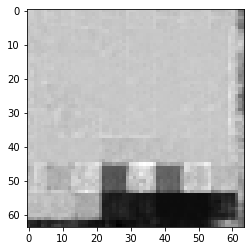

In [48]:
dim=(256,256)
im = cv2.imread("D:/1A work/jupyter/udac/LIVDET WORK/pred/digital/real/999.JPG")
test_image=cv2.resize(im,dim)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=normalize(test_image)
test_image = np.expand_dims(test_image, axis = 0)
test_image = np.expand_dims(test_image, axis = 3)
pm=model.predict(test_image) 
f=model.predict(test_image) 
plt.imshow(f[0],cmap='gray')

In [49]:
#test_image.shape 

In [50]:
fm=list()
fm=pm
for i in range(len(pm)):
    if fm.any()>=0.3:
        fm[i] =1
    else:
        fm[i] =0
fm

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]]], dtype=float32)

In [51]:
test_aug, test_label_aug = augment_data(test_img, test_label, 1)
test_aug = np.asarray(test_aug)

In [52]:
pred = loaded_model.predict(test_aug)

NameError: name 'loaded_model' is not defined

In [ ]:
print(pred)


In [ ]:
pred1 = pred.flatten()
print(pred1)

In [ ]:
pred_list = list()
for i in range(0, len(pred1)):
    pred_val = pred1[i]
    if pred_val >=0.50001:
        pred_list.append(1)
    else:
        pred_list.append(0)

In [ ]:
print(len(pred_list))
# print(pred_list)

In [ ]:
# x1=cnf(input_im,128) 
# p1 = MaxPooling2D(pool_size=(4, 4))(x1)
# p1=actc(p1)


# x2=cnf(p1,256) 
# p2 = MaxPooling2D(pool_size=(2, 2))(x2)
# p2=actc(p2)


# x3=cnf(p2,256) 
# p3 = MaxPooling2D(pool_size=(2, 2))(x3)
# p3=actc(p3)


# x4=cnf(p2,32) 
# y = MaxPooling2D(pool_size=(1, 1))(x4)
# y= Conv2D(1, kernel_size=9, strides=1, padding='same', kernel_initializer = 'he_normal')(y) 
# y = MaxPooling2D(pool_size=(2, 2))(y)
# y= Conv2D(1, kernel_size=9, strides=1, padding='same', kernel_initializer = 'he_normal')(y) 
 
  
# model = Model(input_im, y)


In [ ]:
 weight_decay = 1e-4
# num_classes = 1
# resnet18 = ResNet18(input_shape=(di, di, 1), classes=num_classes, weight_decay=weight_decay)    

input_im = Input(shape=(di, di, 1))
#input_img=Lambda(lambda x:3*x**2-2*x**3)(input_im) 

x1=cnh(input_im,32,9,2) 
x1=cnh(x1,32,9,2) 
p1 = MaxPooling2D(pool_size=(2, 2))(x1)
p1 = Activation('relu')(p1)
x2=cnh(x1,64,9,1) 
x2=cnh(x2,64,9,1) 
x2=mdsr2(x2,3)
p2 = MaxPooling2D(pool_size=(2, 2))(x2)
p2 = Activation('relu')(p2)
y= Conv2D(1, kernel_size=3, strides=1, padding='same', kernel_initializer = 'he_normal')(p2) 
 
  
# model = Model(input_im, y)


 

 
 
 
  
model = Model(input_im, y)


##### 